<a href="https://www.kaggle.com/code/udaykanchanpally/turning-and-pruning-predicting?scriptVersionId=250592273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv
/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


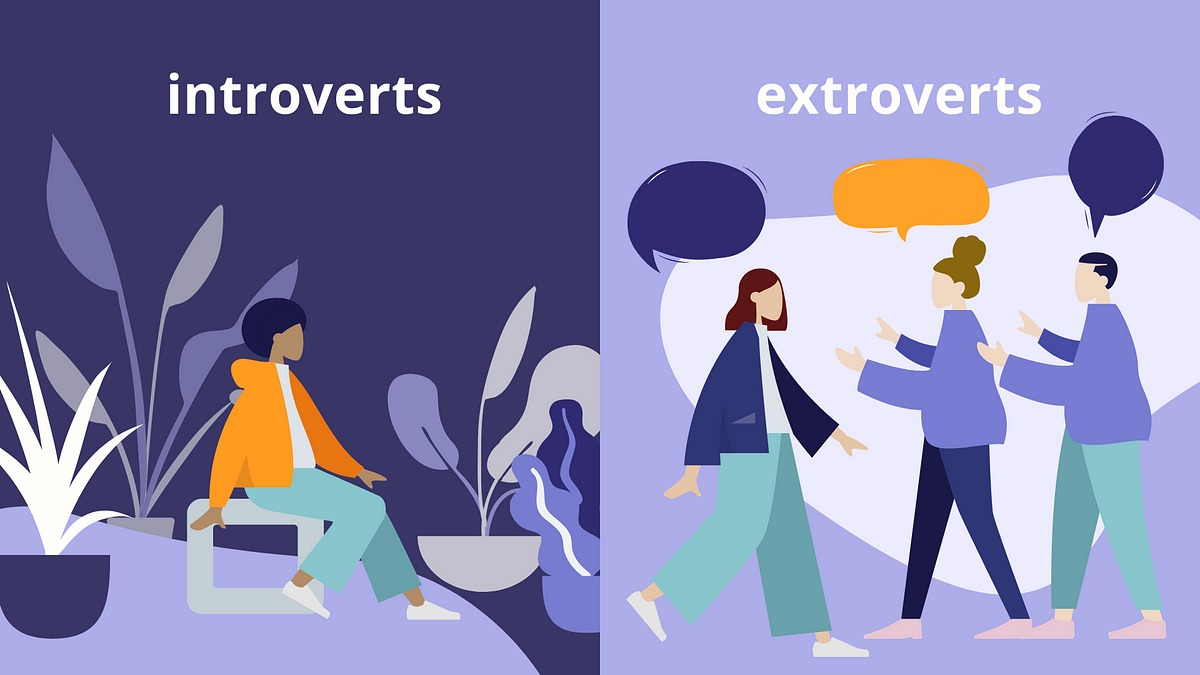

# 🎯 Project Goal

To build an accurate machine learning model that predicts a person's personality type — **Introvert** or **Extrovert** — using features related to **social behavior** and **personality traits**, as part of the **2025 Kaggle Playground Series**.

The objective is to maximize **accuracy** on the test set, as submissions are evaluated using the **Accuracy Score** between predicted and actual labels.

📁 The final submission must include predictions for each `id` in the test set in the following format:



# 📊 Evaluation

Submissions are evaluated using the **Accuracy Score**, which measures the proportion of correct predictions compared to the actual target values.

Your goal is to **maximize accuracy** by correctly predicting each individual's personality as either **Introvert** or **Extrovert**.

---

# 📁 Submission File

For each `id` in the test set, you must predict the corresponding `Personality`.

The submission file must:

- Contain a header row
- Include two columns: `id` and `Personality`


## 🧩 Additional Dataset

We will be using the **“Extrovert vs Introvert Behavior Data”** from Kaggle. It includes behavioral and social-media engagement metrics to help 
https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

### 📋 Dataset Highlights

- **Features** include:
  - `Time Spent Alone`, `Social Event Attendance`
  - `Friends Circle Size`, `Post Frequency`
  - Engagement metrics: `Likes`, `Shares`, `Comments`, `Total_Engagement`
  - Target label: `Personality` (Introvert / Extrovert)

- **Size & Scope**: Synthetic survey-based data, enriched for EDA, with strong signal in engagement-related behavior :contentReference[oaicite:2]{index=2}.

- **Use Case**: Ideal for:
  1. **Interactive EDA** — explore distribution, outliers, correlations.
  2. **Preprocessing** — imputing missing values, scaling, encoding categorials.
  3. **Modeling** — binary classification (Introvert vs Extrovert), including baseline and advanced models.




## 📥 Data Loading

We begin by loading the dataset into a Pandas DataFrame. Make sure the dataset CSV file is placed in the correct directory (usually `/kaggle/input/...` on Kaggle).




In [75]:
original  = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
data = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")

In [76]:
val = original.shape[0]
end= data.shape[0] +val

ids = [i for i in range(val, end)]
data["id"] = ids

In [77]:
train = total_train = pd.concat([original, data], ignore_index=True)

In [78]:
train 

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
21419,21419,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
21420,21420,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
21421,21421,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
21422,21422,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


## 🛠️ Preprocessing  Let’s perform full EDA (Exploratory Data Analysis)

To prepare the dataset for modeling, we'll apply several preprocessing techniques using **scikit-learn Pipelines**. These steps ensure that missing data, inconsistent scales, and categorical values are handled systematically and reproducibly.

### 🔧 Steps Involved

1. **Imputing Missing Values**
   - **Numeric columns**: Missing values will be filled using the **mean** strategy.
   - **Categorical columns**: Missing values will be filled using the **most frequent** (mode) value.

2. **Scaling Numeric Features**
   - Features like `Time Spent Alone`, `Likes`, and `Total_Engagement` may vary widely in scale.
   - We'll use **StandardScaler** to normalize these features, improving model performance.

3. **Encoding Categorical Variables**
   - Categorical features (if present) will be transformed using **Binary**, allowing the model to treat categories as binary indicators.

### 🧪 Tools Used
- `SimpleImputer` (from `sklearn.impute`)
- `StandardScaler` (from `sklearn.preprocessing`)




## step : 1


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21424 non-null  int64  
 1   Time_spent_Alone           20171 non-null  float64
 2   Stage_fear                 19458 non-null  object 
 3   Social_event_attendance    20182 non-null  float64
 4   Going_outside              19892 non-null  float64
 5   Drained_after_socializing  20223 non-null  object 
 6   Friends_circle_size        20293 non-null  float64
 7   Post_frequency             20095 non-null  float64
 8   Personality                21424 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [80]:
train.isnull().sum()

id                              0
Time_spent_Alone             1253
Stage_fear                   1966
Social_event_attendance      1242
Going_outside                1532
Drained_after_socializing    1201
Friends_circle_size          1131
Post_frequency               1329
Personality                     0
dtype: int64

🔍 Missing Values per Column:

Stage_fear                   1966
Going_outside                1532
Post_frequency               1329
Time_spent_Alone             1253
Social_event_attendance      1242
Drained_after_socializing    1201
Friends_circle_size          1131
dtype: int64


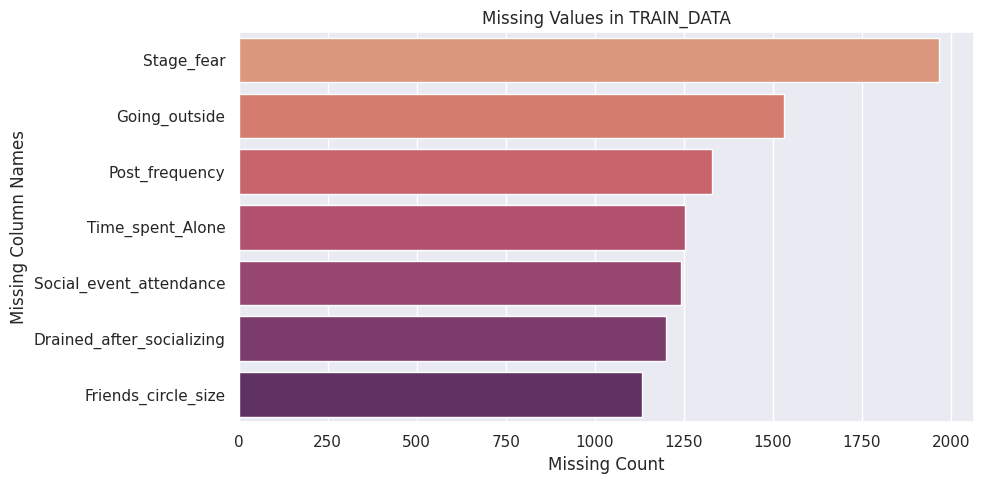

In [81]:


# Copy the dataset


# Calculate missing values per column
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Display missing values in each column
print("🔍 Missing Values per Column:\n")
print(missing)

# Plot missing values per column
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.values, y=missing.index, palette="flare")
plt.title("Missing Values in TRAIN_DATA")
plt.xlabel("Missing Count")
plt.ylabel("Missing Column Names")
plt.tight_layout()
plt.show()


🔍 Missing Values per Column:

Stage_fear                   598
Going_outside                466
Drained_after_socializing    432
Time_spent_Alone             425
Post_frequency               408
Social_event_attendance      397
Friends_circle_size          350
dtype: int64


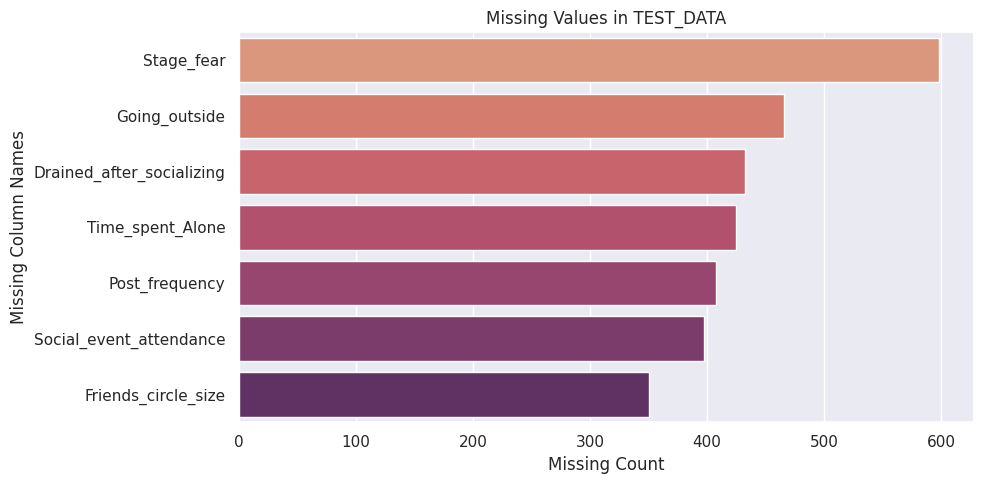

In [82]:

# Copy the dataset


# Calculate missing values per column
missing = test.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Display missing values in each column
print("🔍 Missing Values per Column:\n")
print(missing)

# Plot missing values per column
plt.figure(figsize=(10, 5))
sns.barplot(x=missing.values, y=missing.index, palette="flare")
plt.title("Missing Values in TEST_DATA")
plt.xlabel("Missing Count")
plt.ylabel("Missing Column Names")
plt.tight_layout()
plt.show()


In [83]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
imputer_mode = SimpleImputer(strategy='most_frequent')


In [84]:
train_numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()
test_categorical_cols = test.select_dtypes(include=['object', 'category']).columns.tolist()
test_numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [85]:
train_numerical_cols

['id',
 'Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

In [86]:
for i in train_numerical_cols:
    train[i] = imputer_mean.fit_transform(train[[i]])
   
for i in train_categorical_cols:
    train[i] = imputer_mode.fit_transform(train[[i]]).ravel()

In [87]:
for i in test_numerical_cols:
    test[i] = imputer_mean.fit_transform(test[[i]])
for i in test_categorical_cols:
    test[i] = imputer_mode.fit_transform(test[[i]]).ravel()


In [88]:
train.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21424 non-null  float64
 1   Time_spent_Alone           21424 non-null  float64
 2   Stage_fear                 21424 non-null  object 
 3   Social_event_attendance    21424 non-null  float64
 4   Going_outside              21424 non-null  float64
 5   Drained_after_socializing  21424 non-null  object 
 6   Friends_circle_size        21424 non-null  float64
 7   Post_frequency             21424 non-null  float64
 8   Personality                21424 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   float64
 1   Time_spent_Alone           6175 non-null   float64
 2   Stage_fear                 6175 non-null   object 
 3   Social_event_attendance    6175 non-null   float64
 4   Going_outside              6175 non-null   float64
 5   Drained_after_socializing  6175 non-null   object 
 6   Friends_circle_size        6175 non-null   float64
 7   Post_frequency             6175 non-null   float64
dtypes: float64(6), object(2)
memory usage: 386.1+ KB


In [91]:
train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,21424.000000,21424.000000,21424.000000,21424.000000,21424.000000,21424.000000
mean,10711.500000,3.330177,5.082053,3.895536,7.756369,4.782135
std,6184.720419,3.019202,2.728877,2.044217,4.160312,2.835417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5355.750000,1.000000,3.000000,3.000000,4.000000,3.000000
50%,10711.500000,3.000000,5.000000,4.000000,7.756369,4.782135
75%,16067.250000,4.000000,7.000000,6.000000,11.000000,7.000000
max,21423.000000,11.000000,10.000000,7.000000,15.000000,10.000000


## 🔢 Encoding Categorical Variables


In [92]:
n = len(test_categorical_cols)
print("Number of categorical columns in test data:", n)
for i in test_categorical_cols:
    print(i, "-->", test[i].unique())

print("////////////////////////////////////////////////////")


n = len(train_categorical_cols)
print("Number of categorical columns in train data:", n)
for i in train_categorical_cols:
    print(i, "-->", train[i].unique())  

Number of categorical columns in test data: 2
Stage_fear --> ['No' 'Yes']
Drained_after_socializing --> ['No' 'Yes']
////////////////////////////////////////////////////
Number of categorical columns in train data: 3
Stage_fear --> ['No' 'Yes']
Drained_after_socializing --> ['No' 'Yes']
Personality --> ['Extrovert' 'Introvert']


In [93]:
categorical_vals = {
    "Yes":1,"No":0,
    "Extrovert":1,"Introvert":0 
           }

In [94]:
for i in train_categorical_cols:
    if i != 'Personality':
        train[i] = train[i].map({"Yes":1,"No":0})
    else:
        train[i] = train[i].map({"Extrovert":1,"Introvert":0})
        
for i in test_categorical_cols:
    test[i] = test[i].map({"Yes":1,"No":0})

In [95]:
train = train.round().astype(int)
test = test.round().astype(int)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
scaler.fit(test)

StandardScaler()

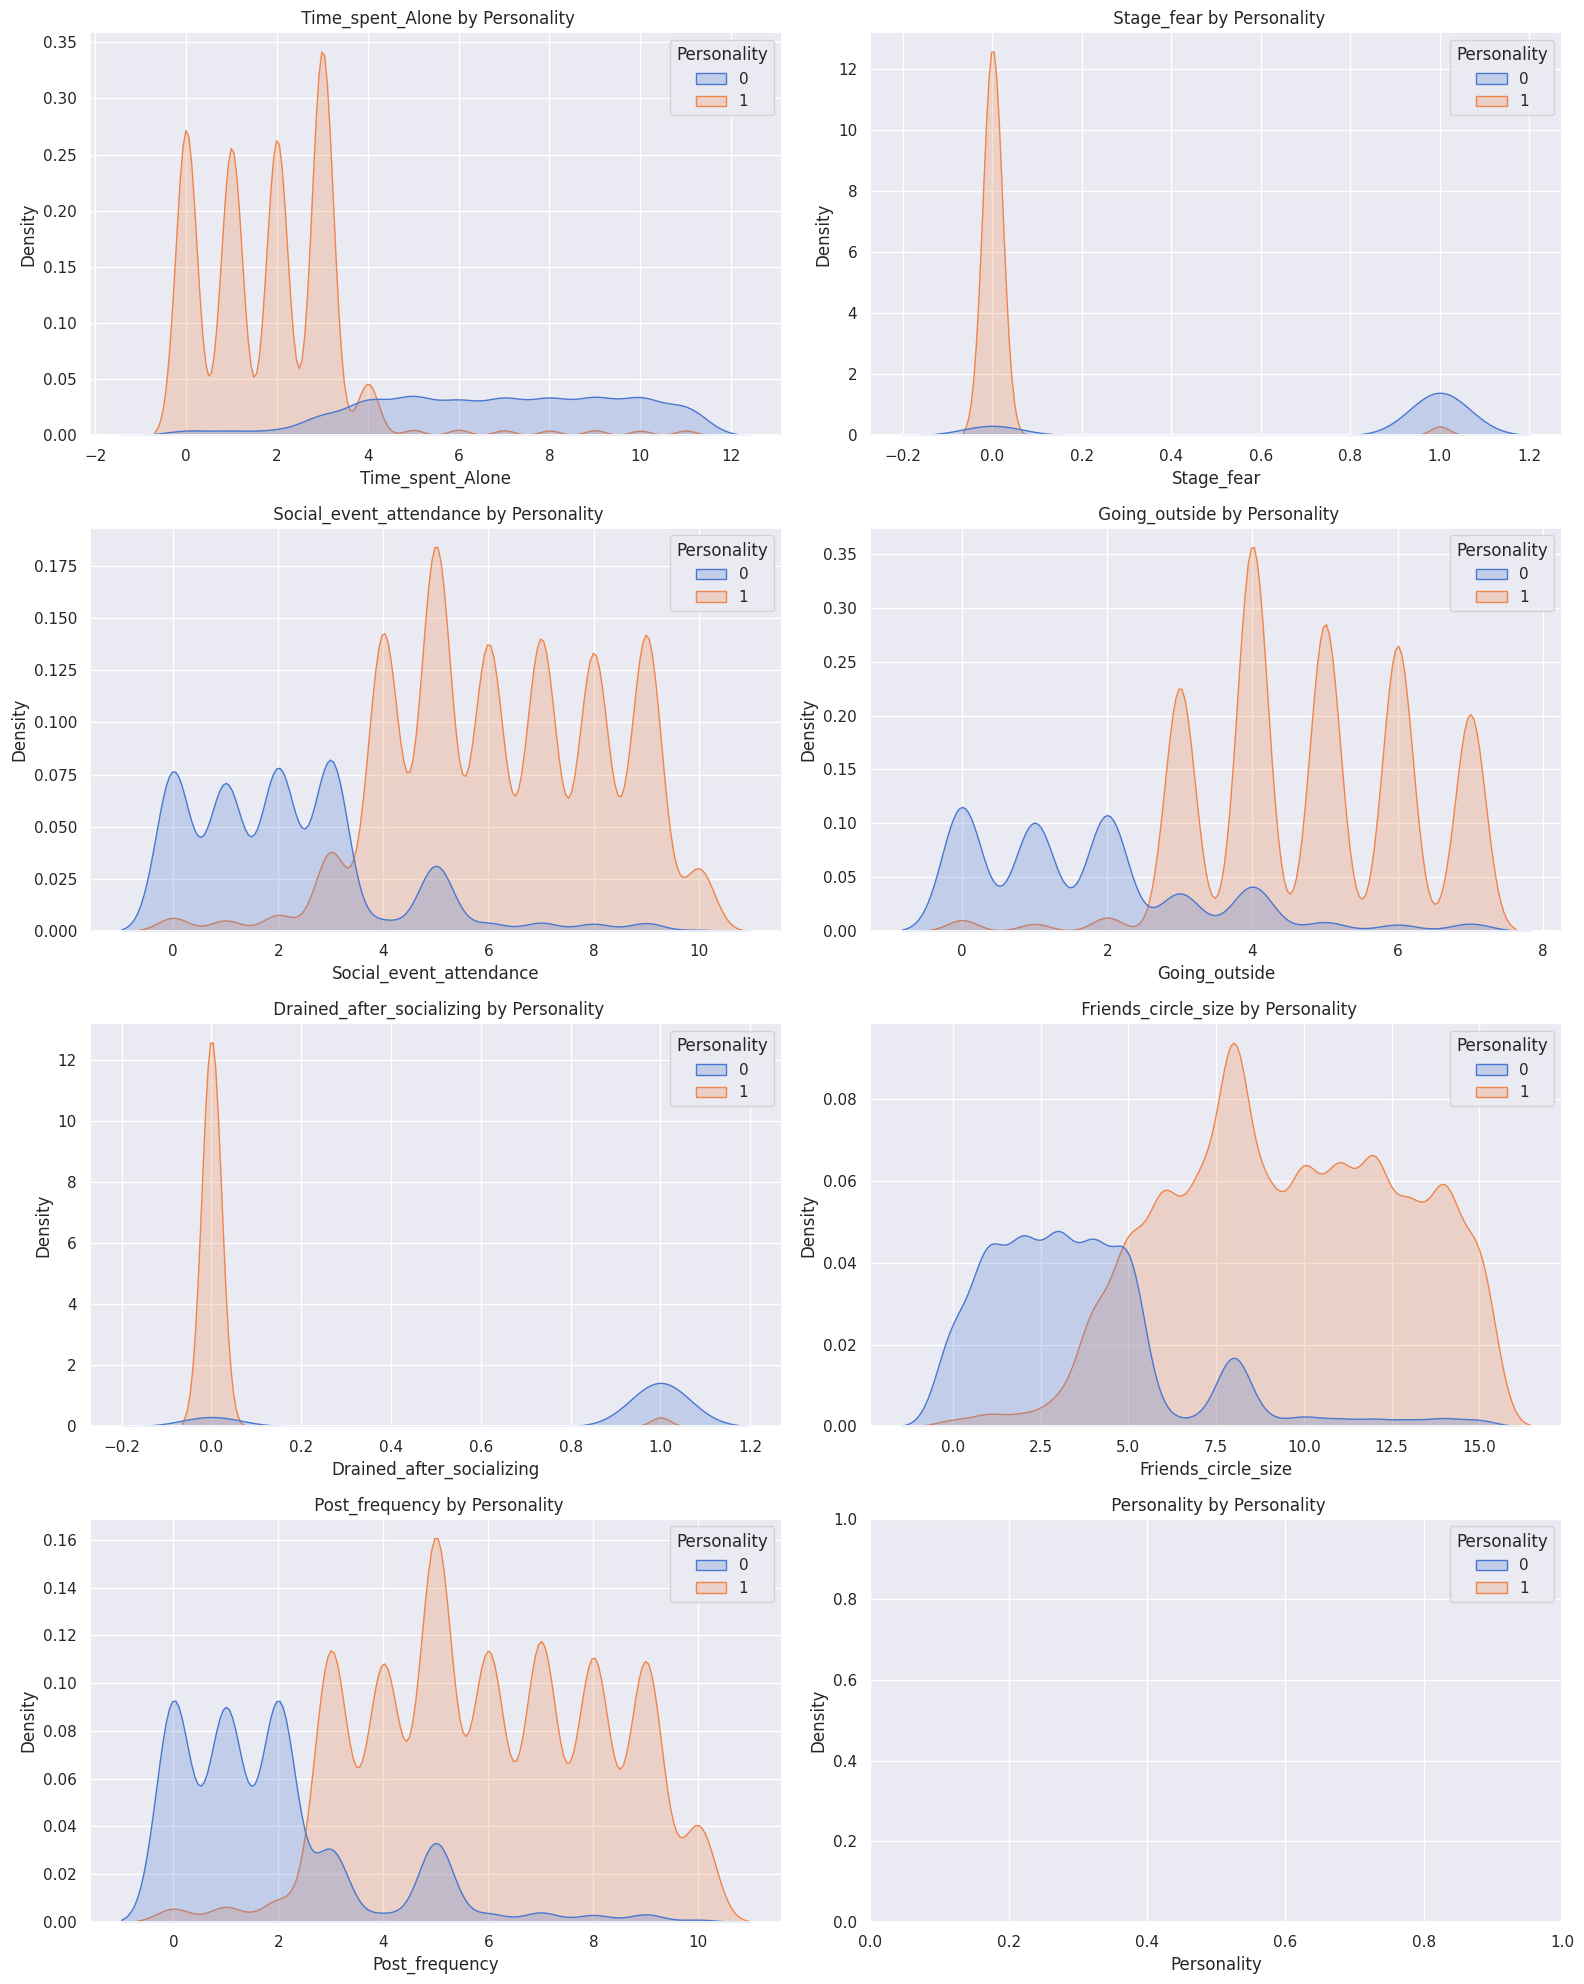

In [97]:

import math

# Set Seaborn style and palette
sns.set(style="darkgrid")
sns.set_palette("muted")

# Select numerical columns except ID and target
train_numerical_cols1 = [col for col in train.select_dtypes(include='number').columns if col != 'id']

# Grid size (e.g., 2 columns per row)
n_cols = 2
n_rows = math.ceil(len(train_numerical_cols1) / n_cols)

# Set up figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

# Plot KDEs
for i, col in enumerate(train_numerical_cols1):
    sns.kdeplot(data=train, x=col, hue='Personality', fill=True, ax=axes[i])
    axes[i].set_title(f" {col} by Personality", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [98]:
train


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0,0,6,4,0,15,5,1
1,1,1,0,7,3,0,10,8,1
2,2,6,1,1,0,0,3,0,0
3,3,3,0,7,3,0,11,5,1
4,4,1,0,4,4,0,13,5,1
...,...,...,...,...,...,...,...,...,...
21419,21419,3,0,7,6,0,6,6,1
21420,21420,3,0,8,3,0,14,9,1
21421,21421,4,1,1,1,1,4,0,0
21422,21422,11,1,1,4,1,2,0,0


In [99]:
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3,0,7,4,0,6,5
1,18525,3,1,0,0,1,5,1
2,18526,3,0,5,6,0,15,9
3,18527,3,0,4,4,0,5,6
4,18528,9,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...
6170,24694,3,0,5,5,0,9,6
6171,24695,8,1,2,1,1,0,0
6172,24696,2,0,4,3,0,9,7
6173,24697,3,0,4,4,0,11,9


# 📊 Correlation Analysis

- Correlation analysis helps identify the strength and direction of relationships between numeric features in the dataset
- #### 🔢 Interpretation Guide

| Correlation Coefficient (r)     | Strength of Relationship |
|---------------------------------|---------------------------|
| 0.90 to 1.00 or –0.90 to –1.00  | Very Strong               |
| 0.70 to 0.89 or –0.70 to –0.89  | Strong                    |
| 0.40 to 0.69 or –0.40 to –0.69  | Moderate                  |
| 0.10 to 0.39 or –0.10 to –0.39  | Weak                      |
| 0.00 to 0.09 or –0.00 to –0.09  | None                      |



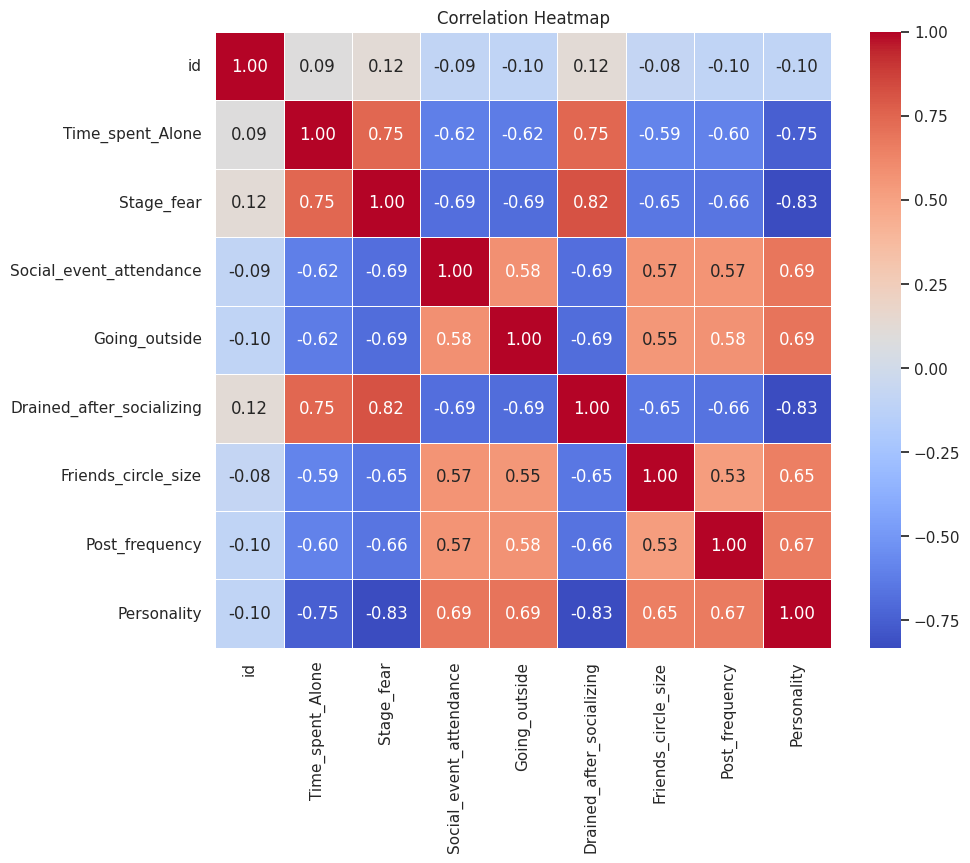

In [100]:
corr = train.select_dtypes(include='number').corr()

# Set figure size and style
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

plt.title('Correlation Heatmap')
plt.show()

# 📈 Model: Logistic Regression
- Chose **Logistic Regression** as a baseline classifier due to its simplicity and interpretability.
- Used `LogisticRegression` from `sklearn.linear_model`.
- Trained the model on the training data.

In [101]:
test


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3,0,7,4,0,6,5
1,18525,3,1,0,0,1,5,1
2,18526,3,0,5,6,0,15,9
3,18527,3,0,4,4,0,5,6
4,18528,9,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...
6170,24694,3,0,5,5,0,9,6
6171,24695,8,1,2,1,1,0,0
6172,24696,2,0,4,3,0,9,7
6173,24697,3,0,4,4,0,11,9


# Tunning the "Parameters"

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [103]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Regularization strength
    'penalty': ['l2'],                          # 'l1' requires 'liblinear' or 'saga'
    'solver': ['lbfgs', 'saga'],                # Solvers that support 'l2'
    'class_weight': [None, 'balanced'],         # Try with and without class balancing
    'max_iter': [100, 500, 1000]                # In case solver needs more time
}


In [104]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',           # You can also try 'f1', 'roc_auc', etc.
    verbose=1,
    n_jobs=-1                     # Use all CPU cores
)


In [105]:
X = train.drop("Personality", axis=1)  # Features
y = train["Personality"]               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,            # 20% test, 80% train
    random_state=42,          # For reproducibility
    stratify=y                # Maintain class distribution
)

In [106]:
grid_search.fit(X, y)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

In [107]:
"""best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))"""

'best_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test)\nprint(classification_report(y_test, y_pred))'

In [108]:
"""
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()"""


'\nConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=\'Blues\')\nplt.title("Confusion Matrix")\nplt.show()'

In [109]:


# Predict on test data
y_pred = best_model.predict(test)

# Map numerical prediction to labels
categorical_vals = {
    1: "Extrovert",
    0: "Introvert"
}
pred_labels = pd.Series(y_pred).map(categorical_vals)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': pred_labels
})

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Successfully model predicted")


Successfully model predicted
